In [17]:
import cv2
import numpy as np
from sklearn.decomposition import KernelPCA, PCA
from scipy import ndimage
import torch
import matplotlib.pyplot as plt

In [2]:
def get_gaussian_kernel(kernel_size:tuple, stddev:float, aniso=False, stddev2=0.2) -> np.array:
    assert kernel_size[0] == kernel_size[1]
    k1 = cv2.getGaussianKernel(kernel_size[0], stddev)
    if aniso: 
        k2 = cv2.getGaussianKernel(kernel_size[0], stddev2)
        k1 = k1 * k2.T
        return k1
    k1 = k1 * k1.T
    return k1

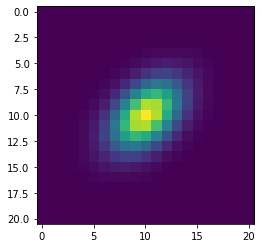

In [19]:

rotated = ndimage.rotate(kernel.reshape((21,21)), 45, reshape=False)
plt.imshow(rotated)

In [22]:
rotated.sum(), kernel.sum()

(0.9999406137196968, 0.9999999999999993)

In [117]:
num_kernels = 10000
pca = PCA(n_components=21)

In [84]:
import pandas as pd

In [172]:
a = []
for i in range(10000):
    a.append(np.clip(np.random.normal(45, 45), 0, 45))

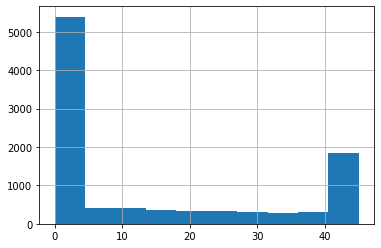

In [171]:
pd.Series(a).hist()

In [173]:
# aniso
aniso = True
rotate = True
scale = 4
np.random.seed(0)
kernels = []
stddevs = []
stddevs2 = []
for i in range(num_kernels):
    stddev = np.random.uniform(0.4, 4.0)
    stddevs.append(stddev)
#     stddev2 = np.random.uniform(max(stddev-0.4, 0.4), min(stddev+0.4, 4.0))
    stddev2 = np.random.uniform(0.4, 4.0)
    stddevs2.append(stddev2)
    kernel = get_gaussian_kernel((21, 21), stddev, aniso, stddev2).reshape(-1)
    if rotate:
#         rotate = np.clip(np.random.normal(22.5, 22.5), 0, 45)
        rotate=np.random.uniform(0, 45)
        kernel = ndimage.rotate(kernel.reshape((21,21)), rotate, reshape=False).reshape(-1)
    kernel = kernel / kernel.sum()
    kernels.append(kernel)

In [174]:
len(kernels)

10000

In [175]:
pca.fit(kernels)
# kpca.fit(kernels)

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [176]:
k_reduced = pca.transform(kernels)

In [177]:
k_reduced.shape

(10000, 21)

In [178]:
k_recon = pca.inverse_transform(k_reduced)
k_recon.shape

(10000, 441)

In [179]:
max(stddevs), min(stddevs)

(3.999920626410602, 0.40026531795918197)

In [180]:
savedict = dict(
    pca = pca,
    kernels = kernels,
    stddevs = stddevs,
    k_reduced = k_reduced,
    k_recon = k_recon,
    scale = scale,
    aniso = aniso,
)

In [181]:
if stddevs2 is not None:
    savedict['stddevs2'] = stddevs2

In [183]:
torch.save(savedict, f"kernels/train/kernel_scale{int(scale)}_{'aniso' if aniso else 'iso'}_dim21_diverse.pth")

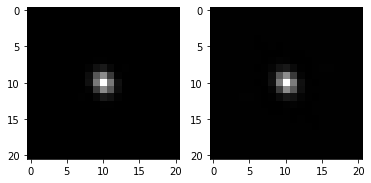

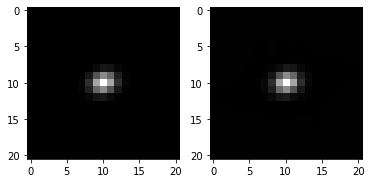

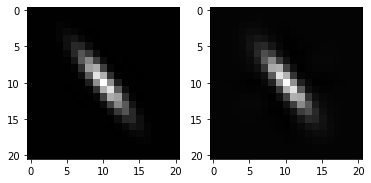

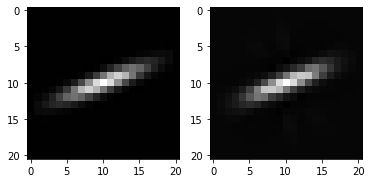

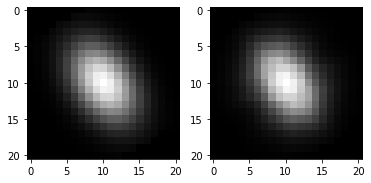

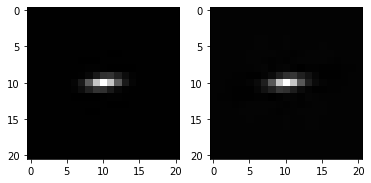

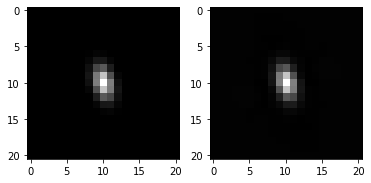

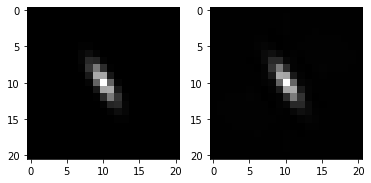

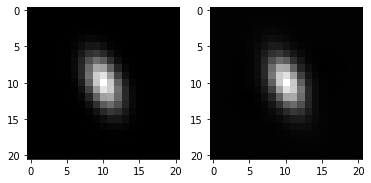

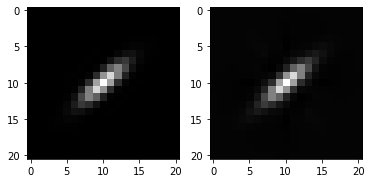

In [182]:
for i in range(20, 30):
    plt.subplot(121)
    plt.imshow(kernels[i].reshape(21, 21), cmap="gray")
    plt.subplot(122)
    plt.imshow(k_recon[i].reshape(21, 21), cmap="gray")
    plt.show()